In [1]:
import pandas as pd
import numpy as np

pd.set_option('precision', 13)
pd.options.display.max_rows = 85


import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(20,12)

import re


%matplotlib inline

In [2]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy import stats


In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import preprocessing

In [4]:
data = pd.read_csv('C:/00_Projects/Lenin/Datasets/04_work_data/cities_100.csv')

In [5]:
data.head()

,region,mun_district,city_type,city,population,street_number,lenin_street_number,monument_OKN_number,monument_lst_number,monument_weight
0,Москва,Москва,г,Москва,12678079,3521,3.0,9.0,112.0,0.0318
1,Санкт-Петербург,Санкт-Петербург,г,Санкт-Петербург,5398064,2220,5.0,6.0,61.0,0.0275
2,Новосибирская область,Новосибирск,г,Новосибирск,1625631,2130,4.0,2.0,15.0,0.0070
3,Свердловская область,Екатеринбург,г,Екатеринбург,1493749,1465,4.0,1.0,11.0,0.0075
4,Татарстан,Казань,г,Казань,1257391,2302,3.0,2.0,18.0,0.0078


In [6]:
data.columns

Index(['region', 'mun_district', 'city_type', 'city', 'population',
       'street_number', 'lenin_street_number', 'monument_OKN_number',
       'monument_lst_number', 'monument_weight'],
      dtype='object')

In [7]:
need_features = ['region', 'mun_district', 'city',
                'population',
                'lenin_street_number', 'monument_OKN_number', 'monument_lst_number']

In [8]:
work = data[need_features]

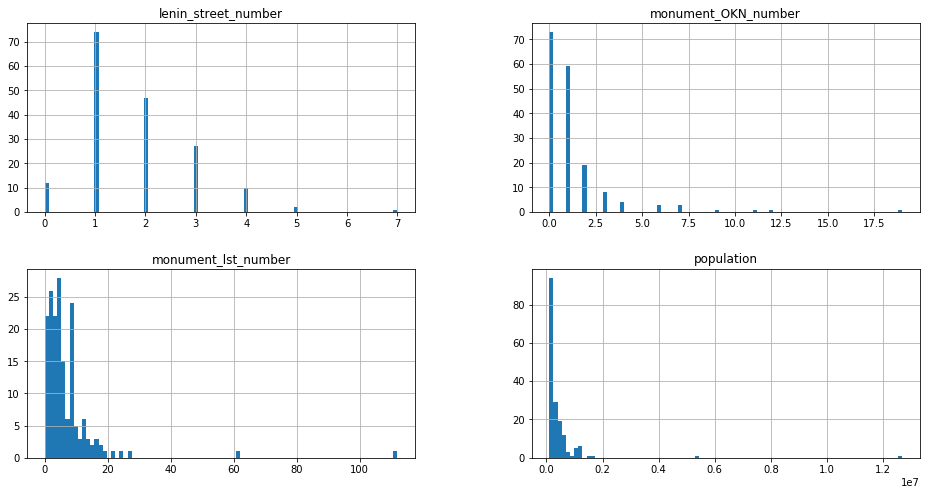

In [9]:
# Гистограммы "для знакомства"

work.hist(bins=85, figsize=(16, 8))
plt.show()

In [10]:
# корреляция

corr_matrix = work.corr()

In [11]:
corr_matrix

,population,lenin_street_number,monument_OKN_number,monument_lst_number
population,1.0000000000000,0.2786972180200,0.3586094156692,0.9346833380909
lenin_street_number,0.2786972180200,1.0000000000000,0.1325262773304,0.3332624621972
monument_OKN_number,0.3586094156692,0.1325262773304,1.0000000000000,0.4530708526923
monument_lst_number,0.9346833380909,0.3332624621972,0.4530708526923,1.0000000000000


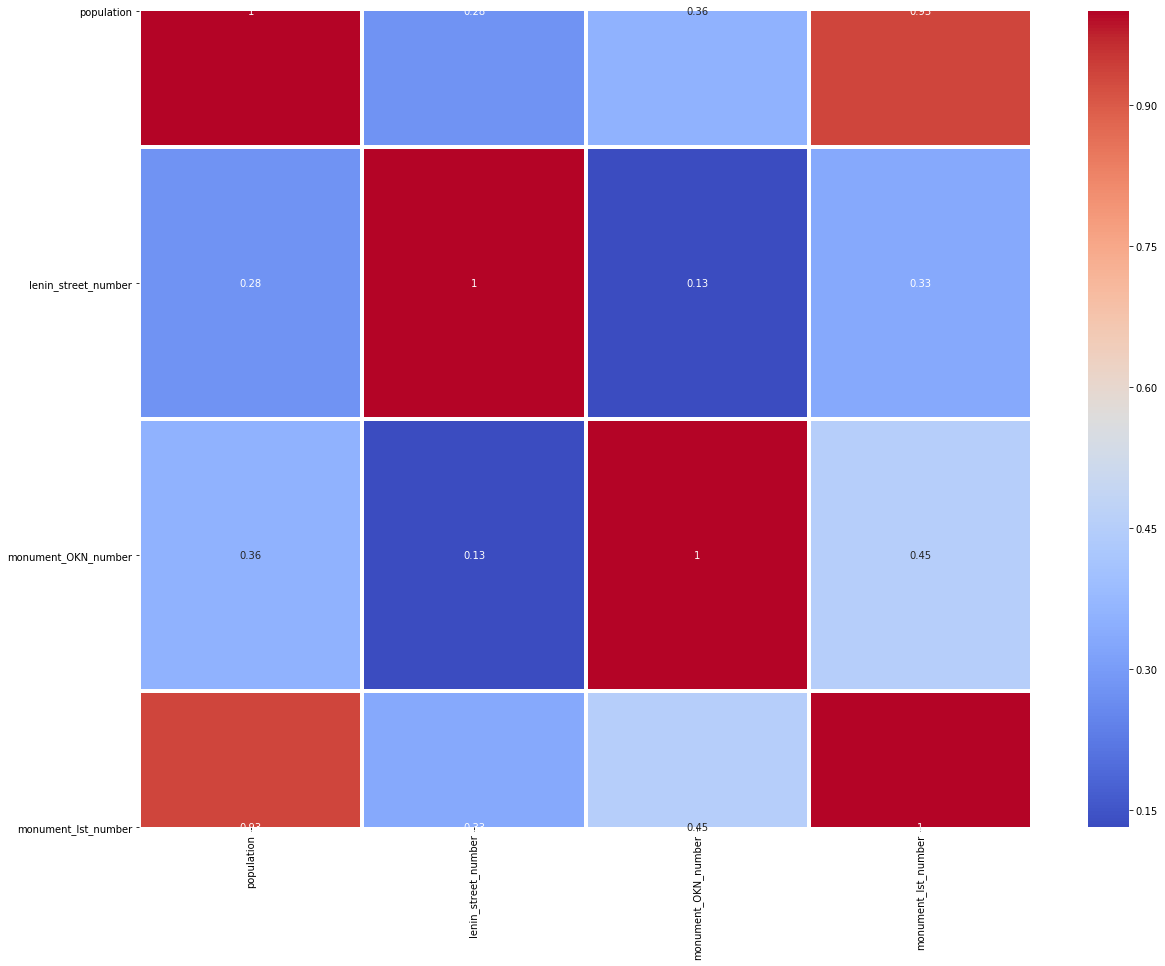

In [12]:
# тепловая карта

sns.heatmap(
    corr_matrix,
    annot=True, cmap='coolwarm', linewidths=3.0,
    xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values
)

fig=plt.gcf()
fig.set_size_inches(20,15)
plt.show()

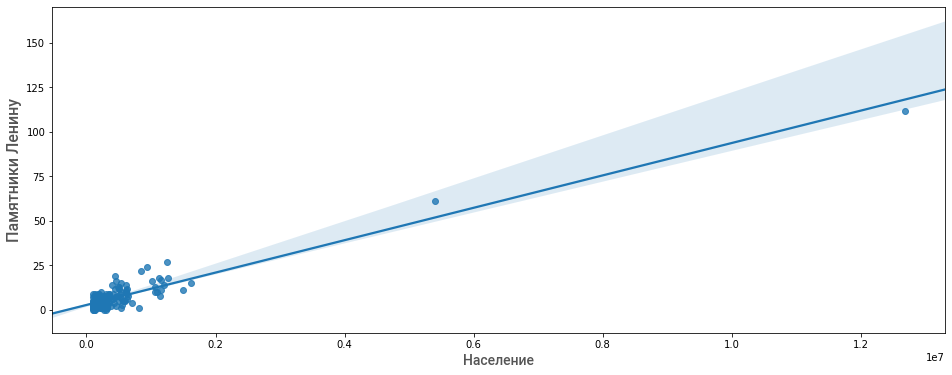

In [13]:
# диаграмма рассеяния для всех и ленинских улиц

plt.rcParams['figure.figsize']=(16,6)

fig, ax = plt.subplots()
sns.regplot(x='population', y='monument_lst_number', data=work, ax=ax)


ax.set_xlabel('Население',
             fontsize = 14,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )

ax.set_ylabel('Памятники Ленину',
             fontsize = 16,
             fontfamily = 'serif',
             fontname = 'roboto',
             weight = 500,
             color = '#555555'
             )
plt.show()

In [14]:
# Проверяем коэффициент Пирсона

x = work.population
y = work.monument_lst_number

In [15]:
# коэффициент Пирсона

pearsonr(x, y)

(0.9346833380908981, 1.0080366902660424e-78)

In [16]:
# посмотрим что там со всеми

work.iloc[:, 3:].describe()

,population,lenin_street_number,monument_OKN_number,monument_lst_number
count,1.7300000000000e+02,173.0000000000000,173.0000000000000,173.0000000000000
mean,4.4239390751445e+05,1.7687861271676,1.3121387283237,6.7861271676301
std,1.0558533661194e+06,1.1380099038241,2.3317132495907,10.2778511873954
min,1.0003900000000e+05,0.0000000000000,0.0000000000000,0.0000000000000
25%,1.3113800000000e+05,1.0000000000000,0.0000000000000,2.0000000000000
50%,2.2704900000000e+05,2.0000000000000,1.0000000000000,5.0000000000000
75%,4.4913800000000e+05,2.0000000000000,1.0000000000000,8.0000000000000
max,1.2678079000000e+07,7.0000000000000,19.0000000000000,112.0000000000000


In [17]:
# города без улиц Ленина

work[work.lenin_street_number == 0].sort_values('population', ascending=False)

#.to_excel('C:/00_Projects/Lenin/Datasets/05_for_viz/table.xlsx', encoding='utf-8', index=False)

,region,mun_district,city,population,lenin_street_number,monument_OKN_number,monument_lst_number
25,Приморский край,Владивосток,Владивосток,606561,0.0,3.0,10.0
50,Белгородская область,Белгород,Белгород,394142,0.0,1.0,6.0
67,Чечня,Грозный,Грозный,305911,0.0,1.0,0.0
81,Татарстан,Нижнекамский,Нижнекамск,240020,0.0,0.0,1.0
89,Иркутская область,Братск,Братск,226269,0.0,0.0,2.0
91,Новгородская область,Великий Новгород,Великий Новгород,224936,0.0,2.0,3.0
109,Ростовская область,Новочеркасск,Новочеркасск,168035,0.0,1.0,4.0
128,Московская область,Одинцово,Одинцово,135506,0.0,1.0,3.0
133,Чувашия,Новочебоксарск,Новочебоксарск,127226,0.0,0.0,1.0
139,Тульская область,Новомосковский,Новомосковск,122306,0.0,2.0,8.0


In [18]:
work[work.monument_OKN_number == 0].sort_values('population', ascending=False).head(10)

,region,mun_district,city,population,lenin_street_number,monument_OKN_number,monument_lst_number
16,Саратовская область,Саратов,Саратов,838042,1.0,0.0,22.0
18,Самарская область,Тольятти,Тольятти,699429,3.0,0.0,4.0
32,Татарстан,Набережные Челны,Набережные Челны,533839,2.0,0.0,1.0
36,Липецкая область,Липецк,Липецк,508573,5.0,0.0,12.0
51,Ханты-Мансийский АО,Сургут,Сургут,380632,1.0,0.0,2.0
53,Забайкальский край,Чита,Чита,351784,2.0,0.0,7.0
54,Свердловская область,Нижний Тагил,Нижний Тагил,349008,2.0,0.0,9.0
55,Архангельская область,Архангельск,Архангельск,346979,4.0,0.0,9.0
59,Волгоградская область,Волжский,Волжский,323906,3.0,0.0,1.0
66,Московская область,Подольск,Подольск,308130,3.0,0.0,8.0


In [19]:
work[work.monument_lst_number == 0].sort_values('population', ascending=False)

,region,mun_district,city,population,lenin_street_number,monument_OKN_number,monument_lst_number
67,Чечня,Грозный,Грозный,305911,0.0,1.0,0.0
72,Ханты-Мансийский АО,Нижневартовск,Нижневартовск,277668,1.0,0.0,0.0
132,Ханты-Мансийский АО,Нефтеюганск,Нефтеюганск,127255,1.0,0.0,0.0
140,Ингушетия,Назрань,Назрань,122261,0.0,0.0,0.0
145,Ямало-Ненецкий АО,Новый Уренгой,Новый Уренгой,118033,1.0,0.0,0.0
158,Ямало-Ненецкий АО,Ноябрьск,Ноябрьск,106911,1.0,0.0,0.0


In [20]:
work[(
    (work.lenin_street_number == 0) &
    (work.monument_lst_number == 0)
)]

,region,mun_district,city,population,lenin_street_number,monument_OKN_number,monument_lst_number
67,Чечня,Грозный,Грозный,305911,0.0,1.0,0.0
140,Ингушетия,Назрань,Назрань,122261,0.0,0.0,0.0
